In [102]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
from matplotlib.pyplot import figure
from collections import Counter

# This will adjust the configuration of the plots
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

# This will create a dataframe for our CSV data set and allow us to read in the data
df = pd.read_csv(r'C:\Users\auddi\OneDrive\Desktop\Portfolio Projects Python\Movies Python Portfolio Project\movies.csv')

In [8]:
# Now taking a look at the data I imported.  This will display the first few rows
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [88]:
#I will now run a statistical summary of the numerical columns and specifically pay attention to the budget, gross, votes and runtime columns.
df.describe()

,year,score,votes,budget,gross,runtime,yearcorrect
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739,2001.814794
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698,10.550774
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000,1980.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000,1993.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000,2002.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000,2011.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000,2020.000000


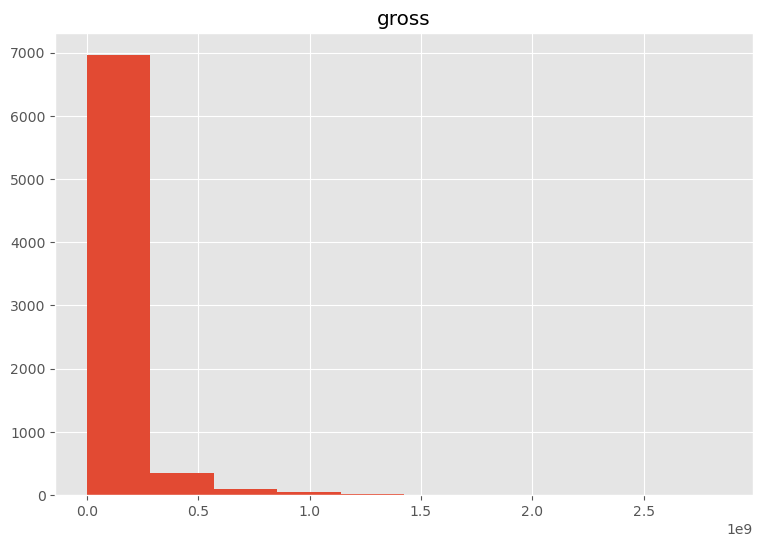

In [164]:
# This are somewhat helpful, but I will reate a histogram of gross revenue to see more clearly.
df.hist(column = 'gross', #Column to plot
        figsize =(9,6),    #plot size
        bins=10)          #Number of bins
plt.show()

In [173]:
# The gross revenue is very skewed right, which shows me that there might be some movies with significantly more gross than the mean.
#I will check it out by displaying the first 10 rows oredered by gross descending.  This confirms that there are only 5 movies above a gross revenue of 2 billions
df_gross_sort = df.sort_values('gross', ascending=False)
df_gross_sort[['name', 'gross', 'rating']].head(20)

,name,gross,rating
5445,Avatar,2.847246e+09,PG-13
7445,Avengers: Endgame,2.797501e+09,PG-13
3045,Titanic,2.201647e+09,PG-13
6663,Star Wars: Episode VII - The Force Awakens,2.069522e+09,PG-13
7244,Avengers: Infinity War,2.048360e+09,PG-13
7480,The Lion King,1.670728e+09,PG
6653,Jurassic World,1.670516e+09,PG-13
6043,The Avengers,1.518816e+09,PG-13
6646,Furious 7,1.515341e+09,PG-13
7494,Frozen II,1.450027e+09,PG


In [94]:
# I am also interested in non-numerical columns and what information they might offer.  
# So I will create a list of the categorical columns and get a description for them.
categorical = df.dtypes[df.dtypes == 'object'].index
print (categorical)
df[categorical].describe()

Index(['name', 'rating', 'genre', 'released', 'director', 'writer', 'star',
       'country', 'company'],
      dtype='object')


,name,rating,genre,released,director,writer,star,country,company
count,5421,5421,5421,5421,5421,5421,5421,5421,5421
unique,5336,10,15,2560,2063,3205,1845,50,1475
top,Hercules,R,Comedy,"December 25, 2008 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures
freq,3,2597,1496,7,33,32,40,4319,330


In [112]:
#Based on the categorical columns description, I realize that I would like to know a little bit more about the following 3 categories: rating, genre and star
#I will run a description for each individual column.  I will start with rating and look at the top 5.
rating_counts = Counter(df['rating']) 
top_5 = rating_counts.most_common(5)
for rating, count in top_5:
    print(rating, count)

R 3697
PG-13 2112
PG 1252
Not Rated 283
G 153


In [118]:
#I will now run a similar description for genre and look at the top 10.
genre_counts = Counter(df['genre']) 
top_10 = genre_counts.most_common(10)
for genre, count in top_10:
    print(genre, count)

Comedy 2245
Action 1705
Drama 1518
Crime 551
Biography 443
Adventure 427
Animation 338
Horror 322
Fantasy 44
Mystery 20


In [122]:
#I will find out who are the top stars and look at the top 25.
stars_counts = Counter(df['star']) 
top_25 = stars_counts.most_common(25)
for star, count in top_25:
    print(star, count)

Nicolas Cage 43
Robert De Niro 41
Tom Hanks 41
Denzel Washington 37
Tom Cruise 34
Bruce Willis 34
Johnny Depp 33
Sylvester Stallone 32
John Travolta 31
Mel Gibson 29
Steve Martin 29
Kevin Costner 29
Adam Sandler 28
Robin Williams 27
Jeff Bridges 27
Arnold Schwarzenegger 27
Eddie Murphy 27
Keanu Reeves 27
Ben Stiller 27
Harrison Ford 26
Meryl Streep 25
Matthew McConaughey 25
Mark Wahlberg 25
Matt Damon 25
Richard Gere 24


In [66]:
# The next thing I am going to do is check and see if there is any missing data or null cells.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))



name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [72]:
# I appears from the results above that there are quite a few cells with null values.  
#I will now be dropping the rows with null values from the dataframe.
df = df.dropna()

In [74]:
#Checking to see if this worked
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [76]:
#Now I will be doing some data cleaning and I will start out by displaying the data types for each column
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [78]:
# Changing the data type for budget and gross income
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [56]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [80]:
# I will add a new column that displays the correct year of rerlease matching the release dat, becaus e the current year column doesn't necessarily do so.
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [82]:
# I will sort the data by gross income in descending order
df = df.sort_values (by = ['gross'], inplace = False, ascending = False)

In [84]:
# The command bleow will allow me to be able to scroll through the dataset without limiting it to the first few rows
pd.set_option('display.max_rows', None)

In [177]:
#Displaying distinct Company names and checking for quality of data

df['company'].drop_duplicates().sort_values(ascending=False).head(20)

7129                          thefyzz
5664                      micro_scope
6412         iDeal Partners Film Fund
4007                         i5 Films
6793                       i am OTHER
6420                             erbp
3776                   double A Films
524         Zupnik-Curtis Enterprises
3330      Zucker Brothers Productions
146                  Zoetrope Studios
2213               Zeta Entertainment
6222    Zentropa International Norway
3368          Zentropa Entertainments
535              Zenith Entertainment
5180                  Zazen Produções
3193                      ZapPictures
1321         Zanuck/Brown Productions
1329      Zacharias-Buhai Productions
789         Young Sung Production Co.
5125       Young Hannibal Productions
Name: company, dtype: object

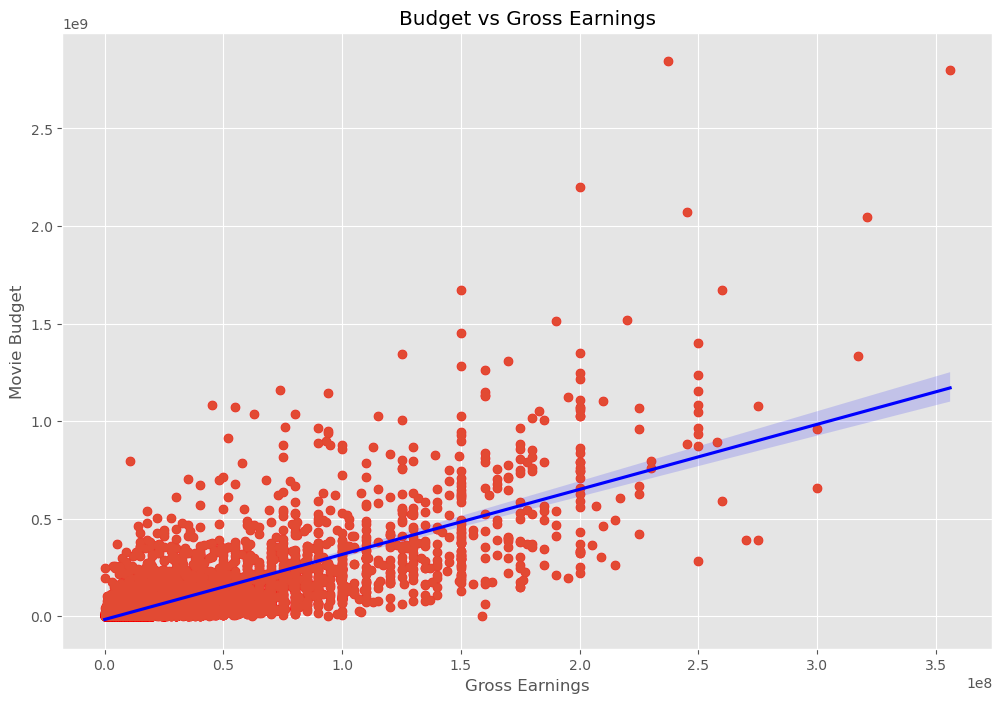

In [36]:
#Now that the data is clean and looks good, I will start the process of checking for correlations between the gross revenue and some of the other elements
# I will start out with a scatterplot between the budget and the gross revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Movie Budget')
plt.show()

In [34]:
# I now create a correlation (Best fit line) between the budget and the gross revenue

sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<Axes: xlabel='budget', ylabel='gross'>

In [48]:
#I will look for correlation in the data using the pearson and spearman correlation methods

df.corr(method='pearson', numeric_only = True)
#df.corr(method='spearman', numeric_only = True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


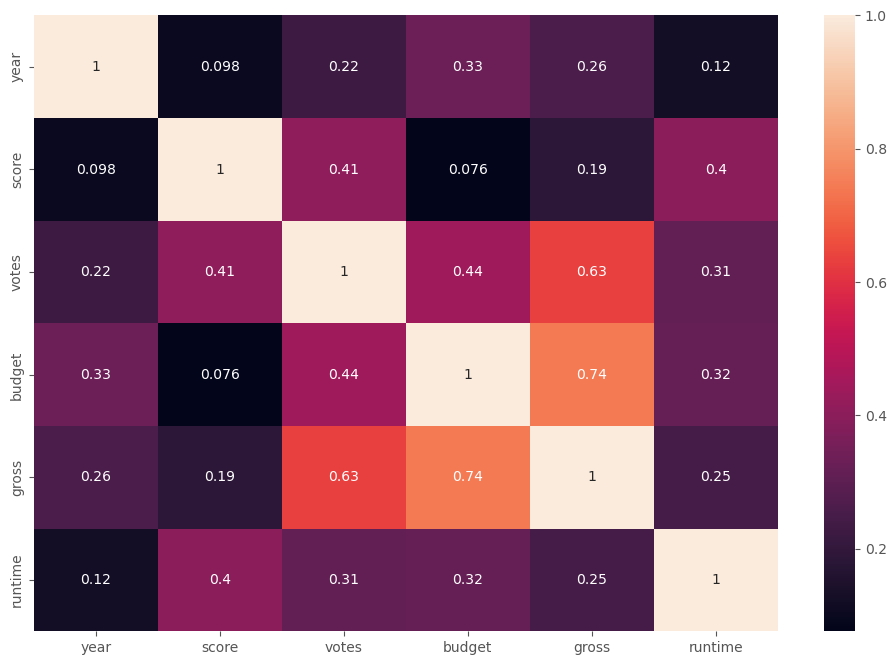

In [54]:
#I will visualize the correlation for easier understanding
correlation_matrix = df.corr(method='pearson', numeric_only = True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
# From the correlation map above, it looks like the higher correlations are between gross revenue, budget and votes.

In [ ]:
# OVERALL FINDINGS:
# The analysis revealed that the gross earnings are correlated to the budget as well as the number of votes.
# Runtime, score and year don't appear to have any significance.
# Rated Pg-13, followed by PG are the top revenue earners, even thogh there are more rated R movies.